In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

In [24]:
# Dataset original
df = pd.read_csv('data\esets_lung_exprs_genes.txt',sep="\t",header=None,index_col=0)

In [25]:
# Preparación de Data - Pablo
df2=df.transpose()
df2.columns=df2.columns.fillna('sample_name')
df2['sample_name']=df2['sample_name'].str[:9]
df3=pd.read_csv('data\E-MTAB-6699.sdrf.txt', sep="\t",header=0,index_col=False)
df4=df3.drop(['Extract Name','Factor Value[disease]'],axis=1)
df5=df3.drop(df4,axis=1)
df5['Tumor']=np.where(df5['Factor Value[disease]']=='tumor',1 ,0)
df6=df5.drop(['Factor Value[disease]'],axis=1)
null_columns4=df2.columns[df2.isna().any()]
df2[null_columns4].isna().sum()
df7=df2.merge(df6,how='inner',left_on='sample_name',right_on='Extract Name',left_index=True)
df7.set_index(df7['sample_name'],inplace=True)
df7=df7.drop(['sample_name','Extract Name'],axis=1)
df_caract=df7.drop('Tumor',axis=1)
df_result=df7.drop(df_caract,axis=1)


In [28]:
# Se junta las caracteristicas con el target
dataset = pd.concat([df_caract, df_result], axis=1, sort=False)

In [29]:
dataset.sample(10)

,RFC2,HSPA6,PAX8,GUCA1A,THRA,PTPN21,CCL5,CYP2E1,EPHB3,ESRRA,...,CCDC63,C16orf52,LOC101929475,LOC389641,LOC400499,GALR3,NUS1P3,TMEM231,LOC100505915,Tumor
sample_name,,,,,,,,,,,,,,,,,,,,,
GSM494648,7.71549908264651,9.01818249503159,7.67266801521301,5.52200156040114,6.99685564425162,7.88263991120087,10.0406130939735,5.12363166577203,7.51967212597733,7.83304485257645,...,4.57194,4.35797,3.2525,4.6678,6.07315,6.06399,4.28279,6.75747,4.67444,1
GSM748261,6.77905845545604,5.27260941516086,7.27656757076718,5.43735032637977,7.48298093809096,7.85510171337092,6.71097619132405,5.84221865581349,6.98133046495374,8.04254869294451,...,4.69696,3.65857,4.32468,4.64302,5.64758,6.07951,4.2767,8.01639,5.05856,1
GSM494586,8.94662156358362,6.25731262532839,7.66839240346591,5.82361058070706,6.99336957385649,5.50742431925746,4.65791225612053,4.75379224465329,10.1606273639436,9.06593201684906,...,4.86842,3.08823,4.77348,5.11341,6.07581,6.23046,4.64576,5.79194,5.40181,1
GSM748063,7.94097582431628,7.85469686559572,7.71115782879524,5.32509021819249,6.98571790148418,6.24373525813275,9.05526280080594,4.31988195998531,9.62384386719008,8.02330338591759,...,4.71781,3.90222,4.42129,4.81428,5.7585,6.03012,4.66924,5.62997,5.15137,1
GSM318141,8.58942019110183,8.81361764370691,8.05527374042159,6.06950412449419,6.30130489763601,6.22052159118469,8.51900410059668,5.30982906248591,8.87726151695046,7.97536780685425,...,4.32836,3.56696,4.31113,4.90516,6.36572,6.44689,5.11455,6.1591,4.86658,1
GSM748106,8.4032438583667,9.26581137246851,8.14159528061228,5.81310159213759,6.62782450866087,6.09607529160039,8.35112290846121,4.74175284276856,7.90886614324922,7.66270640558749,...,4.96778,3.67922,4.40992,4.8417,5.9083,6.19153,5.36828,7.43195,4.9329,1
GSM748054,7.86723413760407,7.65571170646627,7.60303981477516,5.42530908777312,6.71694100949705,7.81003305947854,8.09665251367426,4.72028376787964,7.26246144967133,7.81351282670012,...,4.56828,3.52191,4.40475,5.10208,5.91589,5.60568,4.62707,5.77777,4.75058,1
GSM707373,8.19253600524527,7.80047377650306,7.77555700064579,5.38449526931345,6.83810295432842,5.67079171698356,9.75927510377734,4.9850910539971,9.48485040332648,7.71141656239924,...,4.78834,4.12199,4.51893,4.877,6.14226,6.27386,4.78306,6.13725,5.24176,1
GSM475657,6.92488892290479,7.08250649408187,7.61270163633346,5.41279391468069,6.80148031760782,8.07041230144135,9.78841988232638,5.1952291576767,7.54319354559166,7.40078996545752,...,4.31038,3.8691,4.31237,4.67641,5.99792,6.06762,4.1549,8.81128,5.5559,0


In [33]:
dataset.groupby('Tumor').agg('size')

Tumor
0     147
1    1086
dtype: int64

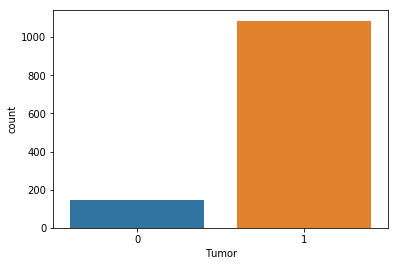

In [34]:
# Data claramente desbalanceada
%matplotlib inline
sns.countplot(x='Tumor', data=dataset)

In [49]:
n_samples_1_new_per = n_samples_1_new / n_samples_1
print(n_samples_1_new_per)

Tumor    0.135359
dtype: float64


## Undersampling


In [50]:
# Undersampling

# variable target = t
t = dataset[['Tumor']]
n_samples = t.shape[0]
n_samples_1 = (t == 1).sum()
n_samples_0 = (t == 0).sum()

## Si se quiere que la clase minoritaria sea el 50% del total
## formula para hallar la cantidad de registros a seleccionar (de la clase mayoritaria) para el undersampling
n_samples_1_new =  n_samples_0 / 0.50 - n_samples_0
n_samples_1_new_per = n_samples_1_new / n_samples_1

dataset_undersampled = pd.concat( 
    [dataset.loc[dataset['Tumor']!=0].sample(frac=n_samples_Y_new_per, replace=False , random_state = 10) , 
     dataset.loc[dataset['Tumor']==0] ])

# reseteamos indices ----
dataset_undersampled.reset_index(drop=True, inplace=True)

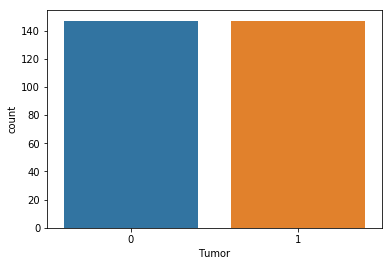

In [53]:
sns.countplot(x='Tumor', data=dataset_undersampled)

## OVERSAMPLING
### SMOTE

In [55]:
dataset.groupby('Tumor').agg('size')

Tumor
0     147
1    1086
dtype: int64

In [60]:
# Undersampling

# variable target = t
t = dataset[['Tumor']]
n_samples = t.shape[0]
n_samples_1 = (t == 1).sum()
n_samples_0 = (t == 0).sum()
n_samples_0_new = 0.50 * n_samples_1 / 0.5 - n_samples_0

Tumor    147
dtype: int64
Tumor    1086
dtype: int64
Tumor    939.0
dtype: float64


In [64]:
# funcion para seleccionar un row aleatorio de un dataframe
def random_row_df(df):
    index_random = random.choice(range(len(df)))
    i = 0
    for index,row in df.iterrows():
        if i==index_random:
            d = {}
            indexs = row.index.tolist()
            values = row.values.tolist()
            for j in range(len(indexs)):
                d[indexs[j]] = [values[j]]
            df_row = pd.DataFrame(d)
            break
        i = i + 1
    return df_row

In [62]:
# seleccionando los puntos base para nueva data de SMOTE
sel_ = dataset.loc[dataset['Tumor'] == 0].iloc[: , :-1].sample(n = int(n_samples_0_new) , replace = True , random_state = 10)

In [68]:
sel_.sample(10)

,RFC2,HSPA6,PAX8,GUCA1A,THRA,PTPN21,CCL5,CYP2E1,EPHB3,ESRRA,...,NAF1,CCDC63,C16orf52,LOC101929475,LOC389641,LOC400499,GALR3,NUS1P3,TMEM231,LOC100505915
sample_name,,,,,,,,,,,,,,,,,,,,,
GSM475754,6.82760488023321,7.72713379800565,7.16340672568774,5.10100911856718,7.18643921486008,7.82519779321989,10.4646110603517,5.15989350546894,7.9928140655051,7.19043935950802,...,6.6626,4.58262,3.57118,3.60502,4.39465,6.20684,5.82859,3.65195,6.30918,5.16404
GSM466964,7.7647964975149,7.2264633886083,8.45093859730876,5.69366709117493,6.82552121472138,7.5752716607235,10.7749054228223,4.68332475893129,6.93720570526721,7.65778204296825,...,6.13451,4.6856,3.58368,4.59886,5.08159,6.28562,6.12573,3.57773,5.88102,5.30823
GSM773766,7.32432427640838,7.43847744630792,7.49546859562831,5.58634058302228,7.34488394261153,9.07376136159494,9.73646895222708,4.96425875048873,7.35688869850359,7.56586282207999,...,6.14666,4.9878,4.06524,4.24369,4.49939,5.896,5.95601,4.28084,6.155,5.31203
GSM466986,7.61816129018587,7.48783544087771,7.50486235143955,5.28551509410295,7.24687078406026,7.3425629995077,8.83000606039189,5.02426340939549,6.8597559216209,7.42268334418065,...,6.41948,4.79529,3.36566,3.94249,4.43147,6.32591,5.76825,4.71307,5.89375,4.97348
GSM748233,7.57460311271563,7.3342792838479,7.71890579249007,5.72302872038481,6.917719082951,8.74051901966046,8.9416318511643,4.58858016009832,6.67632782727583,7.64008576994024,...,6.5014,4.53504,3.83678,4.45902,4.53983,5.90633,6.20258,4.77435,8.59018,4.69298
GSM475807,7.60301724143967,7.6356189957404,7.88589866651185,5.4517035550426,6.87821728028584,6.54002819411424,9.3419936920073,5.41192071392892,7.0250232431967,7.8920796196644,...,7.67877,4.65614,3.63146,4.52919,4.77001,6.54255,5.74033,4.14811,6.13477,4.77698
GSM475671,7.61551964714324,8.11070694981473,7.26252507297915,5.17257773090188,6.86772269214429,7.6007443028113,9.19222294905111,4.83324931732439,6.79212966935803,7.69493556358606,...,6.95956,4.81545,4.05255,4.29218,4.65233,6.55607,5.68917,4.52123,6.79812,5.14993
GSM467015,7.19629912817002,8.44391749945639,7.32425669978714,5.29872614378752,7.32360192915556,7.59020416394607,10.072815552392,4.77677994143486,6.92172598084275,7.57850671933337,...,6.49095,4.53209,3.88655,4.01757,4.69131,5.90667,6.12191,4.60445,6.28451,5.40714
GSM475666,7.79518448787199,6.47620447687008,8.10791721451766,5.85836741788503,6.93014379702148,6.02339769175841,10.0705701059549,5.37558807299387,7.9894461013963,8.01563943941792,...,6.33019,4.89839,3.34539,4.65645,4.94045,6.40981,6.56361,4.38518,5.65032,5.54721


In [70]:
sel_flt= sel_.astype(float)

In [71]:
sel_flt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 939 entries, GSM466961 to GSM467015
Columns: 20545 entries, RFC2 to LOC100505915
dtypes: float64(20545)
memory usage: 147.2+ MB


In [ ]:
# randoms para generacion de nueva data 
steps = np.random.uniform(size = int(n_samples_0_new[0]))

# generacion de nueva data (rows) con SMOTE
i=0
df_news = None
for index , row in sel_flt.iterrows():
    d = {}
    indexs = row.index.tolist()
    values = row.values.tolist()
    for j in range(len(indexs)):
        d[indexs[j]] = [values [j]]
    df_initial = pd.DataFrame(d)
    
    step = steps[i]
    
    #SMOTE
    # df_new ES EL PUNTO SINTETICO Y TOMADO COMO MUESTRA DE 
    # LA CLASE MINORITARIA (N)
    df_new = df_initial - step * (df_initial - random_row_df(sel_flt))
    
    #se concatena todos nuevos rows generados del SMOTE
    df_news = pd.concat([df_news , df_new])
    i = i +1 


In [ ]:
df_news['Tumor'] = 0
dataset_smoted = pd.concat([dataset , df_news])

# reseto de indices
#dataset_smoted.reset_index(drop = True , inplace = True)




In [ ]:
sns.countplot(x='Tumor', data=dataset_smoted)